Example code to run luminaire module from... https://medium.com/dataman-in-ai/time-series-with-zillows-luminaire-f86c3a3f8e6f

Refer the details in... https://github.com/dataman-git/codes_for_articles/blob/master/Luminaire.ipynb

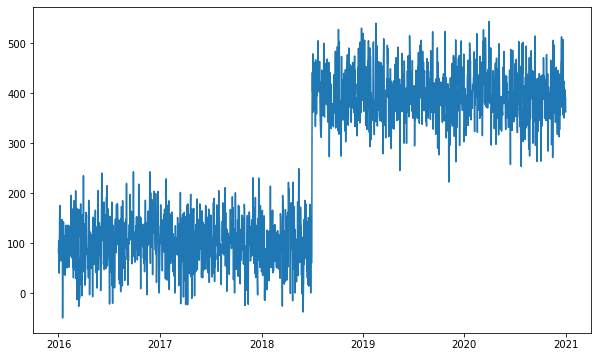

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#Create example data
time_idx = pd.date_range(start='2016-01-01',end='2020-12-31',freq='D')
mu1 = 100
sigma1 = 50
mu2 = 400
sigma2 = 50
seg_len1 = int(len(time_idx)/2)
seg_len2 = len(time_idx) - seg_len1

#generate a timeseries(ts)
ts = np.concatenate([np.random.normal(mu1,sigma1,seg_len1),np.random.normal(mu2,sigma2,seg_len2)])
ts = pd.DataFrame({'index':time_idx,'raw':ts}) # Should be called 'raw'
ts = ts.set_index('index')

plt.figure(figsize=(10,6))
plt.plot(ts['raw'])

Example EDA from luminaire.exploration.data_exploration import DataExploration

In [11]:
import luminaire
from luminaire.model.window_density import WindowDensityHyperParams, WindowDensityModel
from luminaire.exploration.data_exploration import DataExploration

# Without log transformation: is_log_transformed = False (Default)
config = WindowDensityHyperParams().params
de = DataExploration(freq='D',
                     data_shift_truncate=True,
                     is_log_transformed=False,
                     fill_rate=0.1                     
                    )
                    
#Here the time series is daily, so I specify “freq=’D’”. 
#The fill_rate is the minimum proportion of data availability in the recent data window, a fraction between 0 and 1. I just input 0.1.


ts2, profile_summary = de.profile(df=ts)  # the model only accepts a time series with the column name 'raw'
ts2

#The specification also detects the start date and the end date of the time series. 
#I did ask it to do logarithmic transformation. So “is_log_transformed” shows False. 
#Nor I input any minimum mean value for the time series, so “min_ts_mean” shows None. 

,raw,interpolated
2018-07-02,359.115698,359.115698
2018-07-03,438.149025,438.149025
2018-07-04,421.490792,421.490792
2018-07-05,390.185320,390.185320
2018-07-06,380.862555,380.862555
...,...,...
2020-12-27,363.504822,363.504822
2020-12-28,354.135538,354.135538
2020-12-29,384.886251,384.886251
2020-12-30,434.799885,434.799885


In [12]:
print(ts.shape, ts2.shape)
print(profile_summary)

(1827, 1) (914, 2)
{'success': True, 'trend_change_list': ['2018-05-01 00:00:00', '2018-06-19 00:00:00', '2018-07-10 00:00:00', '2018-09-04 00:00:00'], 'change_point_list': ['2018-07-02 00:00:00'], 'is_log_transformed': False, 'min_ts_mean': None, 'ts_start': '2018-01-02 00:00:00', 'ts_end': '2020-12-31 00:00:00'}


In [28]:
change_point_list = list(profile_summary['change_point_list'])
trend_change_list = list(profile_summary['trend_change_list'])
trendline = ts[ts.index.isin(trend_change_list)]

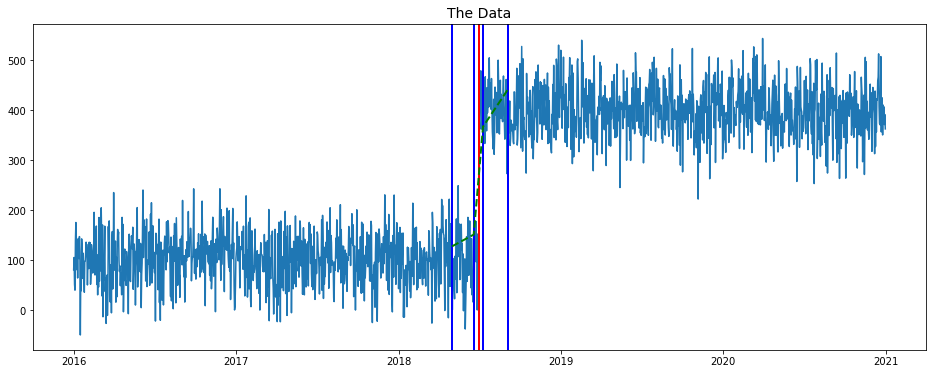

In [29]:
# https://stackoverflow.com/questions/47404678/valueerror-unconverted-data-remains-000000
plt.figure(figsize=(16,6))
plt.plot(ts['raw'], linestyle = '-')
plt.title('The Data',fontsize=14)

#view change points
for x in change_point_list:
    #print(x,type(x))
    x1= datetime.strptime(x,'%Y-%m-%d %H:%M:%S' )
    plt.axvline(x1,lw=2, color='red')

#view trend changes
for x in trend_change_list:
    #print(x,type(x))
    x1= datetime.strptime(x,'%Y-%m-%d %H:%M:%S' )
    plt.axvline(x1,lw=2, color='blue')

#trend line
plt.plot(trendline,lw=2, linestyle='dashed', color = 'green')
plt.show()

#plt.savefig("percentile_plot.png")
#plt.close()